## Heterogenous Human Activity Recognition using Accelerometer and Gyroscope data from Smartphones
### CS746 - Big Data Analytics
#### ( Under the guidance of Dr. Manimala S )

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import  sequence

In [19]:
start_time = time.time()

print('Loading data ...')
data1 = pd.read_csv('Phones_accelerometer.csv',sep="\t|,")
data2 = pd.read_csv('Phones_gyroscope.csv',sep="\t|,")

Loading data ...


/home/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [20]:
data1.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1.424697e+18,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1.424697e+18,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1.424697e+18,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1.424697e+18,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1.424697e+18,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [21]:
data2.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1.424697e+18,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1.424697e+18,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1.424697e+18,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1.424697e+18,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1.424697e+18,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand


In [22]:
data1 = data1.drop(labels = ['Arrival_Time','Creation_Time','Index', 'User'], axis=1)
data1.head()

,x,y,z,Model,Device,gt
0,-5.958191,0.688065,8.135345,nexus4,nexus4_1,stand
1,-5.952240,0.670212,8.136536,nexus4,nexus4_1,stand
2,-5.995087,0.653549,8.204376,nexus4,nexus4_1,stand
3,-5.942718,0.676163,8.128204,nexus4,nexus4_1,stand
4,-5.991516,0.641647,8.135345,nexus4,nexus4_1,stand


In [23]:
data2 = data2.drop(labels = ['Arrival_Time','Creation_Time','Index', 'User','Model','Device'], axis=1)
data2.head()

,x,y,z,gt
0,0.013748,-0.000626,-0.023376,stand
1,0.014816,-0.001694,-0.022308,stand
2,0.015884,-0.001694,-0.021240,stand
3,0.016953,-0.003830,-0.020172,stand
4,0.015884,-0.007034,-0.020172,stand


In [24]:
data2.columns = ['x1','y1','z1','gt1']
data = pd.concat([data1,data2],axis=1)
data.head()

,x,y,z,Model,Device,gt,x1,y1,z1,gt1
0,-5.958191,0.688065,8.135345,nexus4,nexus4_1,stand,0.013748,-0.000626,-0.023376,stand
1,-5.952240,0.670212,8.136536,nexus4,nexus4_1,stand,0.014816,-0.001694,-0.022308,stand
2,-5.995087,0.653549,8.204376,nexus4,nexus4_1,stand,0.015884,-0.001694,-0.021240,stand
3,-5.942718,0.676163,8.128204,nexus4,nexus4_1,stand,0.016953,-0.003830,-0.020172,stand
4,-5.991516,0.641647,8.135345,nexus4,nexus4_1,stand,0.015884,-0.007034,-0.020172,stand


In [25]:
to_drop = ['null']
data = data[~data['gt'].isin(to_drop)]
data = data[~data['gt1'].isin(to_drop)]
data.head()

,x,y,z,Model,Device,gt,x1,y1,z1,gt1
0,-5.958191,0.688065,8.135345,nexus4,nexus4_1,stand,0.013748,-0.000626,-0.023376,stand
1,-5.952240,0.670212,8.136536,nexus4,nexus4_1,stand,0.014816,-0.001694,-0.022308,stand
2,-5.995087,0.653549,8.204376,nexus4,nexus4_1,stand,0.015884,-0.001694,-0.021240,stand
3,-5.942718,0.676163,8.128204,nexus4,nexus4_1,stand,0.016953,-0.003830,-0.020172,stand
4,-5.991516,0.641647,8.135345,nexus4,nexus4_1,stand,0.015884,-0.007034,-0.020172,stand


In [26]:
data = data.drop(labels=['gt1'],axis=1)
data.head()

,x,y,z,Model,Device,gt,x1,y1,z1
0,-5.958191,0.688065,8.135345,nexus4,nexus4_1,stand,0.013748,-0.000626,-0.023376
1,-5.952240,0.670212,8.136536,nexus4,nexus4_1,stand,0.014816,-0.001694,-0.022308
2,-5.995087,0.653549,8.204376,nexus4,nexus4_1,stand,0.015884,-0.001694,-0.021240
3,-5.942718,0.676163,8.128204,nexus4,nexus4_1,stand,0.016953,-0.003830,-0.020172
4,-5.991516,0.641647,8.135345,nexus4,nexus4_1,stand,0.015884,-0.007034,-0.020172


In [27]:
cols_to_norm = ['x','y','z','x1','y1','z1']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

In [28]:
data.head()

,x,y,z,Model,Device,gt,x1,y1,z1
0,-0.121635,0.049030,-0.059868,nexus4,nexus4_1,stand,0.019839,0.003957,-0.024953
1,-0.121269,0.047473,-0.059772,nexus4,nexus4_1,stand,0.020089,0.003631,-0.024733
2,-0.123907,0.046021,-0.054284,nexus4,nexus4_1,stand,0.020339,0.003631,-0.024512
3,-0.120682,0.047992,-0.060446,nexus4,nexus4_1,stand,0.020588,0.002980,-0.024291
4,-0.123687,0.044983,-0.059868,nexus4,nexus4_1,stand,0.020339,0.002004,-0.024291


In [29]:
y = data[['gt']]
data = data.drop(labels=['gt'],axis=1)

Splitting 75% of the data for training and 25% of data for testing ( cross - validation )

In [30]:
data = pd.get_dummies(data)
parameters1 = len(data.columns)

y = pd.get_dummies(y)
parameters2 = len(y.columns)

data = np.array(data)
y = np.array(y)
m = len(data)

crossval = round(3*m/4)
X_train = data[0:crossval,:]
Y_train = y[0:crossval,:]

X_test = data[crossval:,:]
Y_test = y[crossval:,:]


In [31]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_train = np.array(X_train)

X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
X_test = np.array(X_test)
np.random.seed(7)

In [32]:
model = Sequential()
model.add(LSTM(24, input_dim = parameters1,return_sequences=True))
model.add(LSTM(12))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

/home/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/pradeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(24, return_sequences=True, input_shape=(None, 8))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 24)          3168      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
Total params: 5,022
Trainable params: 5,022
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
Accuracy_Arr = np.empty(0)
batch_size_Arr = np.empty(0)
#Fitting data
batch_side = 10
for i in range(4,batch_side):
    model.fit(X_train, Y_train, epochs=10, batch_size=pow(2,i))
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    Accuracy_Arr = np.append(Accuracy_Arr,scores[1]*100)
    batch_size_Arr = np.append(batch_size_Arr, pow(2,i))


Epoch 1/10
5256/5256 [==============================] - 1s 182us/step - loss: 0.1408 - acc: 0.9204
Epoch 2/10
5256/5256 [==============================] - 1s 176us/step - loss: 0.1386 - acc: 0.9207
Epoch 3/10
5256/5256 [==============================] - 1s 176us/step - loss: 0.1366 - acc: 0.9230
Epoch 4/10
5256/5256 [==============================] - 1s 174us/step - loss: 0.1348 - acc: 0.9235
Epoch 5/10
5256/5256 [==============================] - 1s 177us/step - loss: 0.1333 - acc: 0.9246
Epoch 6/10
5256/5256 [==============================] - 1s 206us/step - loss: 0.1323 - acc: 0.9213
Epoch 7/10
5256/5256 [==============================] - 1s 175us/step - loss: 0.1312 - acc: 0.9200
Epoch 8/10
5256/5256 [==============================] - 1s 176us/step - loss: 0.1297 - acc: 0.9212
Epoch 9/10
5256/5256 [==============================] - 1s 174us/step - loss: 0.1288 - acc: 0.9242
Epoch 10/10
5256/5256 [==============================] - 1s 177us/step - loss: 0.1277 - acc: 0.9265
Accuracy:

In [57]:
index,m = 0,Accuracy_Arr[0]
for i in range(1,len(Accuracy_Arr)):
    if Accuracy_Arr[i] > m:
        m = Accuracy_Arr[i]
        index = i
print("Maximum Accuracy is obtained for batch size " + str(pow(2,i)))
print("The accuracy is " + str(m))

Maximum Accuracy is obtained for batch size 32
The accuracy is 76.57914790388656


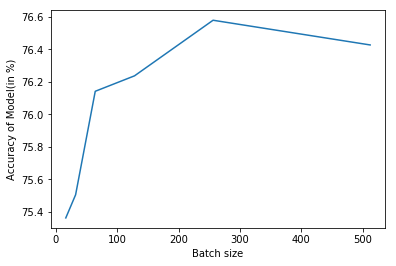

<Figure size 432x288 with 0 Axes>

In [42]:
fig = plt.figure()
plt.plot(batch_size_Arr, Accuracy_Arr)
plt.xlabel("Batch size")
plt.ylabel("Accuracy of Model(in %)")
plt.show()
plt.savefig("AccuracyCurve.png")

In [43]:
model.save('LSTMmodel.h5')

Implemented By : 

Gagan Shetty ( 4JC15CS0  )<br/>
Pradeep Pai  ( 4JC15CS077)<br/>
Rohan Sapare ( 4JC15CS0  )<br/>
Sharath Hebbar ( 4JC15CS100 )<br/>